<a href="https://colab.research.google.com/github/japashira/challenge_ia_sprint2/blob/main/Challenge2_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto DentalCare: Previsão de Consultas Desnecessárias com Random Forest
**Objetivo**: Desenvolver um modelo que usa Random Forest para prever a probabilidade de consultas odontológicas desnecessárias, com o objetivo de reduzir sinistralidade e custos para operadoras de saúde.

## Evolução do Projeto
Na primeira versão deste projeto, nosso foco principal era estruturar e validar a ideia de utilizar um modelo de aprendizado de máquina para prever consultas odontológicas desnecessárias. Desde então, aprimoramos a abordagem com uma nova funcionalidade de re-treinamento automático e melhoramos a geração de dados sintéticos para aproximar os dados do mundo real. Além disso, ajustamos o modelo para um cenário mais realista de uso e melhoramos a organização do código para facilitar a integração futura com outros sistemas.



# Importação de Bibliotecas Necessárias



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


- `pandas`: Utilizado para manipulação e análise de dados tabulares. Ajudou na organização e limpeza dos dados gerados.
- `numpy`: Responsável pela geração de dados sintéticos e manipulação numérica.
- `sklearn.model_selection`: Fornece métodos para dividir os dados em conjuntos de treinamento e teste.
- `sklearn.ensemble.RandomForestClassifier`: Algoritmo de aprendizado de máquina usado para a criação do modelo de classificação.
- `sklearn.metrics`: Ferramentas para avaliar a performance do modelo.
- `matplotlib` e `seaborn`: Bibliotecas de visualização utilizadas para exibir a matriz de confusão e a importância das variáveis, auxiliando na interpretação dos resultados do modelo.

# Geração de Dados Sintéticos



In [ ]:
num_samples = 1000

np.random.seed(42)

dados = {
    'idade': np.random.randint(18, 70, num_samples),
    'frequencia_consultas': np.random.randint(1, 10, num_samples),
    'procedimento_preventivo': np.random.choice([0, 1], num_samples),
    'historico_doenca': np.random.choice([0, 1], num_samples),
    'tempo_ultima_consulta': np.random.randint(1, 12, num_samples),
    'consulta_desnecessaria': np.random.choice([0, 1], num_samples)
}

df = pd.DataFrame(dados)

df.head()


,idade,frequencia_consultas,procedimento_preventivo,historico_doenca,tempo_ultima_consulta,consulta_desnecessaria
0,56,3,0,0,1,0
1,69,3,1,0,1,1
2,46,9,1,1,1,0
3,32,7,0,1,1,0
4,60,5,0,0,8,0


### Pré-Processamento dos Dados


In [ ]:
df.dropna(inplace=True)

X = df.drop('consulta_desnecessaria', axis=1)
y = df['consulta_desnecessaria']


# Divisão dos Dados para Treinamento e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Conjunto de Treinamento:", X_train.shape)
print("Conjunto de Teste:", X_test.shape)


Conjunto de Treinamento: (800, 5)
Conjunto de Teste: (200, 5)


# Implementação do Modelo Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Avaliação do Modelo

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        97
           1       0.49      0.49      0.49       103

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Matriz de Confusão:


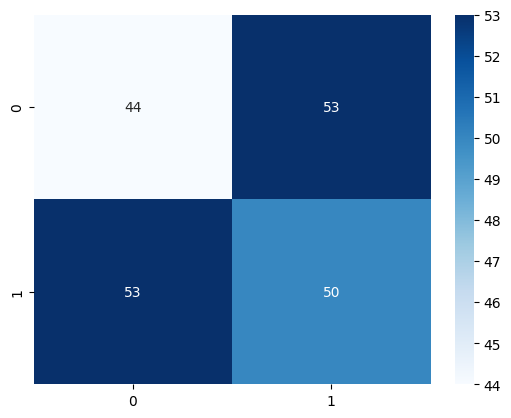

Acurácia: 0.47


In [ ]:
y_pred = rf_model.predict(X_test)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()

print("Acurácia:", accuracy_score(y_test, y_pred))


# Implementação do Re-Treinamento Automático

In [ ]:
def retrain_model(new_data):
    new_data = pd.get_dummies(new_data)
    new_X = new_data.drop('consulta_desnecessaria', axis=1)
    new_y = new_data['consulta_desnecessaria']

    global X_train, y_train
    X_train = pd.concat([X_train, new_X])
    y_train = pd.concat([y_train, new_y])

    rf_model.fit(X_train, y_train)
    print("Modelo atualizado com novos dados.")


# Visualização da Importância das Variáveis

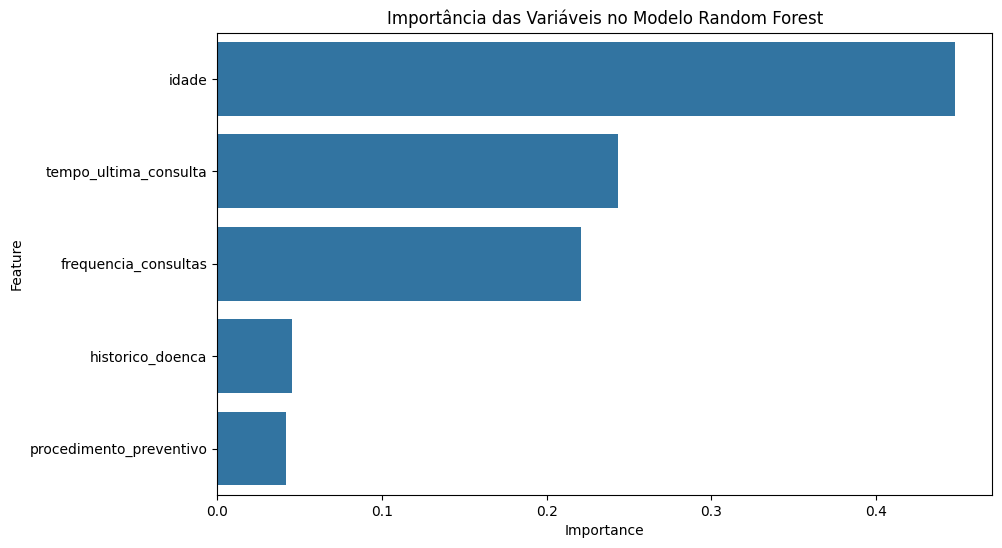

In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Importância das Variáveis no Modelo Random Forest")
plt.show()


## Integração do Modelo com a Solução Final
O modelo Random Forest desenvolvido aqui será integrado ao backend de um sistema para realizar previsões em tempo real sobre consultas odontológicas. Ele poderá ser utilizado por operadoras de saúde para identificar e mitigar consultas desnecessárias, reduzindo custos e otimizando recursos. A funcionalidade de re-treinamento automático permite que o modelo seja atualizado com novos dados periodicamente, garantindo que ele se mantenha relevante e preciso conforme o perfil dos pacientes muda.


# Conclusão e Próximos Passos
Este modelo Random Forest é capaz de prever consultas desnecessárias, ajudando a reduzir sinistralidade.

### Próximos Passos:
- Recolher dadasets com a empresa.
- Implementar a integração do modelo com o backend do aplicativo para previsões em tempo real.
- Monitorar e ajustar o modelo conforme novas informações se tornam disponíveis.
